### Problem 1

Generate 1000 points from a standard normal distribution using Box-Muller transormation
$$Z = \sqrt{-2\log U_1}\cos 2\pi U_2,~~ U_1, U_2 \sim U[0,1]$$
Plot the histogram of the points (``plt.hist``)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline

In [6]:
p = []
for i in range(10000):
    u1, u2 = np.random.random(), np.random.random()
    z = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
    p.append(z)

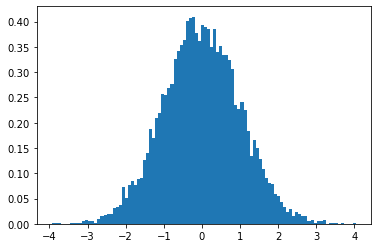

In [7]:
p = np.array(p)
h = plt.hist(p, bins=100, density=True)

### Problem 2
Generate 1000 points from the distribution with the following PDF:
$$p(x) = \begin{cases}
\frac{1}{2x},~x\in [1, e^2]\\
0,~\text{otherwise}.
\end{cases}$$
Plot the histogram and compare with actual PDF.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline

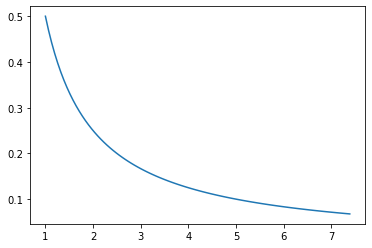

In [8]:
x_base = np.linspace(1, np.exp(2), 100)
plt.plot(x_base, 1/(2*x_base), '-')
plt.show()

In [13]:
x = np.exp(2*np.random.random(size=10000))

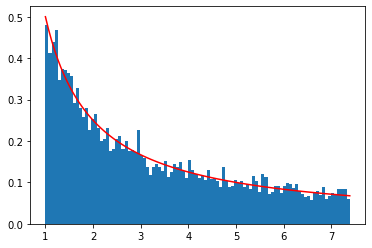

In [14]:
h = plt.hist(x, bins=100, density=True)
plt.plot(x_base, 1/(2*x_base), 'r-')
plt.show()

### Problem 3
Generate 1000 points from the distribution with the following PDF using rejection sampling:
$$p(x) = \frac{1}{\alpha}x\cos x, ~x\in [0; \pi/2], ~\alpha = \pi/2-1$$
Plot the histogram and compare with actual PDF.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline

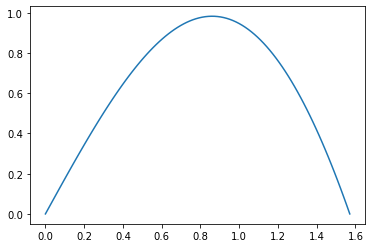

In [15]:
x_base = np.linspace(0, np.pi/2, 100)
alpha = np.pi/2-1
plt.plot(x_base, x_base*np.cos(x_base)/alpha, '-')
plt.show()

In [20]:
p = []
cnt = 0
while len(p)<10000:
    cnt += 1
    x = np.random.random()*np.pi/2
    f = x*np.cos(x)/alpha
    prob = f
    if np.random.random()<f:
        p.append(x)
p = np.array(p)
print(cnt)

15646


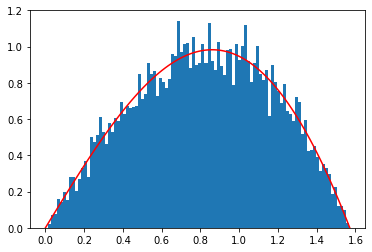

In [21]:
h = plt.hist(p, bins=100, density=True)
plt.plot(x_base, x_base*np.cos(x_base)/alpha, 'r-')
plt.show()

### Problem 4
Find the value of the integral using Monte-Carlo method, compare to the actual value of the integral
$$\int_{1}^{2}xe^{-2x^2}dx$$

In [22]:
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline

In [23]:
I_real = (np.exp(-2) - np.exp(-8))/4

In [27]:
def f1(x):
    return x*np.exp(-2*x**2)

def MC1(n):
    x = np.random.random(size=n)+1
    return np.mean(f1(x))

In [34]:
I = []
N = [1000, 10000, 50000, 100000, 150000]
for n in N:
    I.append(MC1(n))

In [35]:
for i in range(len(I)):
    print(N[i], I[i], np.abs(I[i]-I_real)/I_real)

1000 0.03518890715460439 0.04263567154204063
10000 0.033529057603611634 0.006545121247417725
50000 0.03381302016950802 0.001868595589123397
100000 0.03404815793017061 0.008835649607487646
150000 0.03380593628695067 0.001658702493698421


In [38]:
def f2(x):
    return 3/2*np.exp(-2*x**2)

def MC2(n):
    u = np.random.random(size=n)
    x = np.sqrt(3*u+1)
    return np.mean(f2(x))

In [39]:
I = []
N = [1000, 10000, 50000, 100000, 150000]
for n in N:
    I.append(MC2(n))
for i in range(len(I)):
    print(N[i], I[i], np.abs(I[i]-I_real)/I_real)

1000 0.033152296504150365 0.017708427917381114
10000 0.03477351690745687 0.03032779601229438
50000 0.03368597061333619 0.0018958407071313764
100000 0.03364903764335585 0.0029901523829191767
150000 0.03374038247271111 0.0002836353240551265


### Problem 6
We have an agent that behaves in the following way:
- It starts moving at the point $x=0$
- With probability 0.5 it goes right for 1 unit $x \leftarrow x+1$
- With probability 0.2 it goes left for 3 units $x \leftarrow x-3$
- with probability 0.25 it undoes the last action
- with probability 0.05 it returns to the origin

Plot the probability distribution of where the agent can end up after 100 steps. If we to set up a charging stations, where we should put those?

In [40]:
p = []
for j in range(10000):
    x = [0]
    for i in range(100):
        t = np.random.random()
        if t<0.5:
            x.append(x[-1]+1)
        elif t<0.7:
            x.append(x[-1]-3)
        elif t<0.95:
            x.append(x[-2] if i>1 else x[-1])
        else:
            x.append(0)
    p.append(x[-1]) 

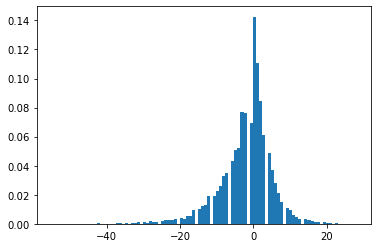

In [41]:
h = plt.hist(np.array(p), bins=100, density=True)

### Problem 6

Find the volume of a unit 3-D sphere.

Find volume of the unit 4-D sphere.
Compare to the precise value $V = \frac{\pi^2}{2}$

In [53]:
N = 10000
X = np.random.uniform(low=-1, high=1, size=(N, 3))

In [54]:
R = np.sqrt(X[:,0]**2+X[:,1]**2+X[:,2]**2)
t = np.mean(R<=1)
print(t)

0.5203


In [55]:
V3 = 8*t
print(V3, 4*np.pi/3)

4.1624 4.1887902047863905


In [59]:
N = 1000000
X = np.random.uniform(low=-1, high=1, size=(N, 4))
R = np.sqrt(np.sum(X**2, axis=1))
t = np.mean(R<=1)
V4 = 16*t
print(V4, np.pi**2/2)

4.934864 4.934802200544679
